## 1.1
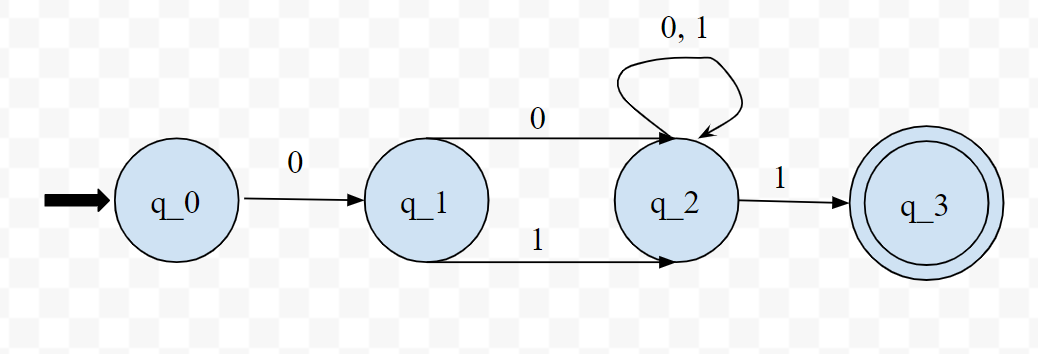
Theorem 1.39
Consider NFA, N, above, that accepts the langauge $0\{0,1\}^+1$ . In other words, any string of 0 and 1's beginning with 0, ending with 1, and at least length 3. We know that some decider, a Turing-Machine T_N, exists that decides N. We first observe that all DFA's are decidable. We know this because any DFA can be represented by a string encoding. Furthermore, a Turing-Machine would be able to simulate this DFA on any input string, since it can store what state the DFA would and should be on, as well as how to transition from there. This is widely accepted, and proven by Sisper in Theorem 4.1. Next, we also observe that any NFA can be converted into a DFA following the algorithm in Sisper's Theorem 1.39. Thus, we can create T_N, a turing machine that decides N given some input string, w (N will be a string encoding of the NFA model above):

T_N on input <N, w>:
1. Convert N into equivalent DFA, D, using Sisper Theorem 1.39
2. Run T_D, a TM that decides D, on input <D, w>
3. If T_D accepts, accept; otherwise, reject

It is impossible for an NFA to never halt, namely because the DFA equivalent will never halt (there are no epsilon transitions in T-D). Thus, because we can simulate the output the T_N, as well as always halt, T_N is a decider for N.


## 1.2

### a)

D1 and print_poly can be thought of as equivalent in terms of the strings that can be decided and generated, respectively.

D1 is, or can be respresented, as a Turing Machine that works through an input string. It will recognize all characters that are common to a single-variable polynomial expression (integers, +, -, etc.) However, it also only recognizes a single variable, x. The machine accepts if an integer root is found within the bounds $ \pm k\frac{c_{max} }{c_1} $, and it rejects otherwise. Nonetheless, it will be able to read and parse all such strings, even the ones it rejects.

print_poly, on the other hand, will generate, through iteration, all strings of the sort:

$a_1x^{e_1} + a_2x^{e_2} + a_3x^{e_3} + ... + a_kx^{e_k}$

With k being the length of $a_i$ and $e_i$, where both lengths are equivalent. Because both sets $a_i$ and $e_i$ can be any intergers, and only integers, we can see that it is the same class of strings determinable by D1. Furthermore, because print_poly only generates single-variable polynomials, that is only with variable x, all strings possibly geenrated by print_poly can be read by D1. There is no characters or formatting of strings generated by print_poly that D1 can not read.

### b)

Yes, I believe poly1 works correctly. Unlike print_poly, poly1 will actually decide something instead of just generating strings. It begins by calling print\_poly to actually generate the input string. It will then set bounds as defined by Sisper 3.3, $ \pm k \frac{c_{max}}{c_1} $ . This bound guarantees us that if there are any integral roots in a single variable polynomial expression, they will exist within these bounds, b. This set of integers, those bounded by b, is finite. Since they're finite, we will always terminate our iterative operation over the set. If an integral root is found, we still iterate until $  +k\frac{c_{max} }{c_1} $, in case there are more integral roots, then terminate and accept. If none are found, we still terminate but reject. poly1 therefore works as it should. If there's an incorrect input, it will reject. If input is correct, and there is an integral root, it will necessarily find them and terminate. If not, bounds ensure it terminates nonetheless.

### c) refer to code cell below

To prove that poly2 and poly1 are indeed equivalent we must show that they both first halt, and second that they decide then same language. As stated in 1.2.b) above, poly1 will always halt, and it decides any two lists, of integers, of equal length. Furthermore, poly1 accepts if the resulting polynomial encoding has integer roots and rejects otherwise. With that being said, we have enough information to see if poly2 will halt as well

Although poly2 uses a different string encoding to match python syntax more closely, it nonetheless accepts two lists of integers as inputs. Furthermore, if the inputs are of an invalid type, or of unequal length, same as poly1, poly2 will reject. For acceptable inputs, it will only iterate over a finite bound. Because the function will always terminate its only loop after iterating through these bounds, poly2 will also always halt. Now we have to decide whether or not when poly2 halts, its outputs are the same as poly1. poly1 manually added each term of the expression without consulting the actual string encoding itself, but rather just the indexes of the list inputs. poly2 adds terms according to the string encoding. Thus if we can show that the string encoding in poly2 is equivalent to the repetitive adding in poly1, then we know the two functions are ultimately equivalent.

poly1 added each term to a temporary variable, p, that stores the value of the expression up until that point. Each term being added on to p follows the form $ a_ix^{e_1} $. Translating that into python syntax, we get $a_i $\*x\*\*($e_i$). Thus, p in poly1 is equivalent to the expression of multiple $ a_ix^{e_1} $ added together, or:

$p_i = a_1x^{e_1} + a_2x^{e_2} +... +a_ix^{e_1} $

We know that the string encoding for poly2 follows the form:
v = $a_1$\*x\*\*$(e_1)$+$a_2$\*x\*\*$(e_2)$+...+$a_i$\*x\*\*$(e_i)$

And because $ a_ix^{e_1} $ is equivalent to $a_i $\*x\*\*($e_i$), the string encoding of poly2, v, is equal to the terms added to $p_i$ in poly1, concluding that poly1 and poly2 both halt and decide over the exact same language, meaning they are equivalent.

In [41]:
# we modify print poly only such that it follows python syntax
def modified_print_poly(a,e):
    w = ''
    for i in range(len(a)):
        if a[i] > 0:
            if w:
                w += '+'+str(a[i])+'*(x**'+str(e[i])+')'
            else:
                w += str(a[i])+'*(x**'+str(e[i])+')'
        elif a[i] < 0:
            w += str(a[i])+'*(x**'+str(e[i])+')'
    return w

def poly2(a, e):
    if len(a) != len(e):
        w = 'the number of coefficients and exponents do not match'
        decide = 'reject'
    else:
        # generate a printable string w with the polynomial
        w = modified_print_poly(a,e)
        
        # generate a printable string v that is python evaluable
        v = modified_print_poly(a,e)
        # coefficient with the largest absolute value
        c_max = max([abs(y) for y in a ])
        # c1 is the coefficient of the highest order term
        e_max, i = max((abs(v),i) for i,v in enumerate(e))
        c1 = abs(a[i])
        # count how many terms are in the polynomial a_i not = 0
        k = sum([1 for i in a if i != 0])
        #compute bound b = +/- k*c_max/c1
        b = k*c_max//c1
        roots = []
        for x in range(b*-1, b+1,1):
            # if integer x inputted into expression evaluates to 0, it is an integral root
            if eval(v)==0:
                roots.append(x)
        if roots:
            sroots = [str(i) for i in roots]
            sroots = ','.join(sroots)
            w += ' <integer roots:'+sroots+'>'
          
            decide = 'accept'
        else:
            w += ' has no integer roots found'
            decide = 'reject'
    return decide, w 

#tests showing that poly2 does indeed work, and its outputs match poly1
print(poly2([1,6,8], [2,1,0]))
print(poly2([1,4,4], [2,1,0]))
print(poly2([1,16,48], [2,1,0]))
print(poly2([1,-2,-24], [2,1,0]))
print(poly2([2,6,8], [2,1,0]))
print(poly2([1,-3,-24], [2,1,0]))

('accept', '1*(x**2)+6*(x**1)+8*(x**0) <integer roots:-4,-2>')
('accept', '1*(x**2)+4*(x**1)+4*(x**0) <integer roots:-2>')
('accept', '1*(x**2)+16*(x**1)+48*(x**0) <integer roots:-12,-4>')
('accept', '1*(x**2)-2*(x**1)-24*(x**0) <integer roots:-4,6>')
('reject', '2*(x**2)+6*(x**1)+8*(x**0) has no integer roots found')
('reject', '1*(x**2)-3*(x**1)-24*(x**0) has no integer roots found')


### d)

poly2 will run on any computer that has a python3 interpreter running. In that sense, virtually any computer should run poly2 in the exact way. There are two reasons for this. The first being that python is a turing complete language; meaning, if a computer can run python it is essentially also a turing complete device. We know this because 1) intuitively it wouldn't make sense for a universally adopted language like python to not be turing-complete, and 2) we can simulate a Turing-Machine with python code, as we have seen in the automata.lib library. The importance of this is that the algorithms and functions that can be calculated by python, Java, or any other turing complete language, should be doable on any other turing-complete device. The second reason is that the python3 compiler is a predefined context-sensitive grammar. This means that any computer with python3, with all other factors being equal (no viruses, physical damage etc.), will interpret and compile poly2 in the exact same way. Because of these two factors

## Question 2

### a) Write a brief summary of Sisper PCP problem

We can think of the problem as arranging a set of dominoes (tiles with two halves, one on top, and one on bottom) such that all the top strings when joined equals the bottom strings. For example, say we are given collection of dominos: $\{ [\frac{ab}{a}], [\frac{ab}{ba}], [\frac{baa}{bb}], [\frac{c}{aac}]\}$ . This would be called a match, since reading off the top strings we get "ababbaac" and same for the bottom. The PCP problem is trying to determine whether or not a collection of dominoes, P, has a match.

### b) Show why PCP is undecidable over binary alphabet $\Sigma_B = \{0, 1\}$.

We build off of Sisper's proof in Theorem 5.15 that PCP is undecidable over an alphabet $\Sigma_A = \{k_1, k_2, k_3, ..., k_i\}$ . Since this is true, if we can find a way to reduce, or map, $\Sigma_A$ to $\Sigma_A$, then PCP must also be undecidable over $\Sigma_A$ due to homomorphism. We know this to be true from Sisper corollary 5.23:

"If A ≤m B and A is undecidable, then B is undecidable"

Let us reduce all strings in $\Sigma_A$ to $\Sigma_B$: <br/>
$\Sigma_B$ = f($\Sigma_A$) = bin($\Sigma_A$)

with bin() being a function that converts string inputs into their ASCII binary form (if for some reason $\Sigma_A$ has over the 256 characters allotted for in ASCII, we can simply modify bin() to produce a unique 10, 11, 12 etc. digit binary number enough for our use case. No matter what, $\Sigma_A$ is going to be finite, so there will be some definite length of binary numbers that will be able to represent all characters. Because each character is also equal in length, we will never have the case of two conjoined binaries being misinterpreted for another value. Because we have successfully reduced $\Sigma_A$ to $\Sigma_B$, PCP over $\Sigma_B$ is also undecidable.

### c)

We begin with a collection of dominoes, P:

$P = \{ [\frac{t_1}{b_1}], [\frac{t_2}{b_2}], [\frac{t_3}{b_3}],..., [\frac{t_k}{b_k}]\}$

And grammar G as defined in the problem:

$S \rightarrow T | B $ <br/>
$T \rightarrow t_1Ta_1 | t_2Ta_2 |... t_kTa_k | t_1a_1 |... | t_ka_k $ <br/>
$B \rightarrow b_1Ba_1 | b_2Ba_2 |... b_kBa_k | b_1a_1 |... | b_ka_k $ <br/>

With $a_1, a_2, ..., a_k$ being the labels for the tiles of P. So tile $\{ [\frac{t_1}{b_1}]\}$ would be called $a_1$ for example. We can see that there is only an ambiguous word generated by this grammar if and only if there is a match in this instance of PCP. Thus, by reducing $AMBIG_{CFG}$ to PCP, the question of deciding if a grammar is ambiguous or not, or in other words, deciding $AMBIG_{CFG}$, is the same as deciding PCP, whether or not a match exists. Therefore, since PCP is undecidable, $AMBIG_{CFG}$ must also be undecidable.

## Question 3 (Concluding Remarks)

Using examples from real-world computational applications, identify some of the roles of
recognizers, deciders, and enumerators in computational sciences, also summarize in your own
words the concepts of decidability, reducibility, and computability.

Decidability:

The concept of decidability revolves around whether or not we can always produce an answer to a problem. Not only any answer, but the correct one. The important thing to keep in mind is "always produce the correct answer," which in other words, some machine will always halt. Given near-infinite resources, we can be assured that at some point, some machine will output correctly and stop. If such a machine exists, that always halts on the correct output, then we say that the set is decidable.

Computability:

Computability revovles around if we are even able of coming up with an algorithmic solution to a problem. All undecidable problems are also uncomputable. The field of computability theory focuses on coming up with ways to solve problems algorithmically, and whether or not that's even possible. By other definitions, computability theory also discusses matters of complexity, so complexity theory. Not only do we want to know if we can solve something, but how efficiently or realistically can we do so.

Reducability:

Reducability is whether or not we can map, or "equivocate," one problem to another. Is there a way in which we can take the input to one problem, and through a function generate them to perfectly match the inputs of another problem. If so, we can gain a lot of insight into the nature of problems, what makes them solvable or difficult to solve. For example, suppose we know set A is undecidable by proof, but we can't seem to figure out a good way to solve B. It's harder to wrap our head around, more verbose, whatever it might be. However, you notice that B and A are actually similar in some way, and figure out a function to map, or reduce, B to A. Given that this reduction is valid, you can easily conclude B is also undecidable as well. Reducibility is a powerful tool for many proofs.

Real-World application of Deciders and Recognizers:

Deciders and recognizers are crucial for compilers and interpreters. They basically have to return to us whether or not human-readable input that we give to it (written code) can be accepted by a certain language, and if so, how should it then be "translated" into the machine/computer code. It is because of this that we have certain programming languages, and really the foundation of modern computation. Furthermore, because we know Turing machines and any turing-equivalent machine can compute the same problems, we can have any turing-complete language on a device solve the same problem, even with different implementations.

Enumerators:
Enumerators are Turing-Machines that also have an attached printer, so they generate and then print all strings in a language. These are relevant to many generator functions which have a similar purpose



## HC's

#algorithms - this tag is for problem 1.2.d). An algorithm with slight modifications to poly1 is successfully made. Although the improvements are modest, the analysis that follows provides a thorough understanding of what algorithms fundamentally are, and why they translate across many different programming languages and devices. The way that inputs are parsed, compiled, interpreted using decidability principles are all highlighted, leading to a well-contextualized implementation of the poly2 algorithm

#heuristics - Our reduction approach to problem 2c) is a creative heuristic applied that saved us a good amount of time. Although perhaps niche to the realm computational theory, when proving undecidability, I think a useful heuristic to employ is "reduce if possible." Instead of coming up with a long-winded proof from the ground up showing why AMBIG_CFG is undecidable, we instead followed that intuition inspired by the heuristic. The reason being, in most cases, it will be easier to reduce a problem to another one that we already know to be undecidable, instead of building individual proofs for each. This way, we build a catalog of sorts of undecidable problem. This gives researchers a much greater advantage, since instead of time-consuming proofs, they can cover more ground by expanding known undecidable problems through reductions.